### Seunghye Jeon DIGHUM 150C Final Project
### Comparison of Katherine Mansfield's Stories with the Adjectives

In [1]:
#import libraries here
import nltk
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
import numpy as np 

### Corpus for the final project

In [2]:
import requests
response = requests.get('https://raw.githubusercontent.com/JonathanReeve/course-computational-literary-analysis-readings/66e9523f68a31107236f2c7d1e1791b9980468e7/content/texts/garden-party.md')
garden_party = response.text

In [3]:
shortStories = {
    "The Garden Party": [("And after all the weather was ideal.", "The Daughters of the Late Colonel")],
    "The Daughters of the Late Colonel": [("The week after was one of the busiest weeks of their lives.", "Mr. and Mrs. Dove")],
    "The Young Girl": [("In her blue dress, with her cheeks lightly flushed, her blue, blue eyes", "Life of Ma Parker")],
    "Marriage a la Mode": [("On his way to the station William remembered with a fresh pang","The Voyage")],
    "Her First Ball": [("Exactly when the ball began Leila would have found it hard to say.","The Singing Lesson")],
    "An Ideal Family": [("That evening for the first time in his life, as he pressed through","The Lady’s Maid")],
}

In [4]:
mansfieldStories = {}
for story in shortStories:
    for interval in shortStories[story]:
        start = garden_party.find(interval[0])
        end = garden_party.find(interval[1])
        if story not in mansfieldStories:
            mansfieldStories[story] = garden_party[start:end]
        else:
            mansfieldStories[story] += garden_party[start:end]

In [5]:
{stories: text[:100] for stories, text in mansfieldStories.items()}

{'The Garden Party': 'And after all the weather was ideal. They could not have had a more\nperfect day for a garden-party i',
 'The Daughters of the Late Colonel': 'The week after was one of the busiest weeks of their lives. Even when\nthey went to bed it was only t',
 'The Young Girl': 'In her blue dress, with her cheeks lightly flushed, her blue, blue eyes,\nand her gold curls pinned u',
 'Marriage a la Mode': 'On his way to the station William remembered with a fresh pang of\ndisappointment that he was taking ',
 'Her First Ball': 'Exactly when the ball began Leila would have found it hard to say.\nPerhaps her first real partner wa',
 'An Ideal Family': 'That evening for the first time in his life, as he pressed through the\nswing door and descended the '}

For the final project, I would like to compare Katherine Mansfield’s Short Stories mainly focusing on the adjectives used in the stories.

### The length, in words, of each text in the corpus

In [6]:
def textLength(text):
    textTokenized = nltk.word_tokenize(text)
    length = len(textTokenized)
    return length

In [7]:
len_dict = {stories: textLength(text) for stories, text in mansfieldStories.items()}

<BarContainer object of 6 artists>

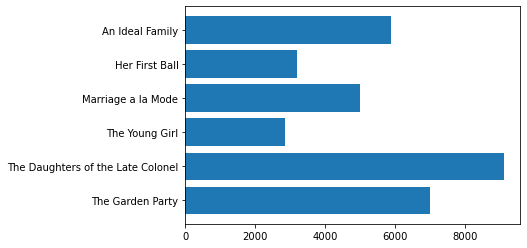

In [8]:
stories = list(len_dict.keys())
lengths = list(len_dict.values())
plt.barh(stories,lengths)

Among Katherine Mansfield’s short stories, I chose 6 of them which we annotated in class. Those are ‘The Garden Party,’ ‘The Daughters of the Late Colonel,’ ‘The Young Girl,’ ‘Marriage a la Mode,’ ‘Her First Ball,’ and ‘An Ideal Family.’
I first compared the length of the corpus. The Garden Party has 6987 words, The Daughters of the Late Colonel has 9124 words, The Young Girl has 2850 words, Marriage a la Mode has 4998 words, Her First Ball has 3178 words, and An Ideal Family has 3178 words.
The shortest text is The Young Girl with 2850 words and the longest text is The Daughters of the Late Colonel with 9124 words.
Since each story has different length, I thought this can affect the analysis for example when I count how many times certain words appear in the text. This is because if the text itself is longer, there is a higher chance that the certain words could appear. Therefore, to avoid this kind of situation, I used the proportion of the word instead of the raw count to reduce the effect that can happen due to the length difference of the text.

### Frequency of adjectives / Frequency of Superlatives + Noun

In [9]:
adj_proportion = {}

def get_adjectives(text):
    adjectives = []
    tokens = nltk.word_tokenize(text.lower())
    tags = nltk.pos_tag(tokens)
    for i in enumerate(tags):
        if "JJ" in i[1][1]:
            adjectives.append(i[1])
    return(len(adjectives)/len(tokens))

for story in mansfieldStories:
    adj_proportion[story] = get_adjectives(mansfieldStories[story])

adj_proportion

{'The Garden Party': 0.06039788178044941,
 'The Daughters of the Late Colonel': 0.1035843472541927,
 'The Young Girl': 0.39473684210526316,
 'Marriage a la Mode': 0.2939175670268107,
 'Her First Ball': 0.5412208936438011,
 'An Ideal Family': 0.35866416766058956}

<BarContainer object of 6 artists>

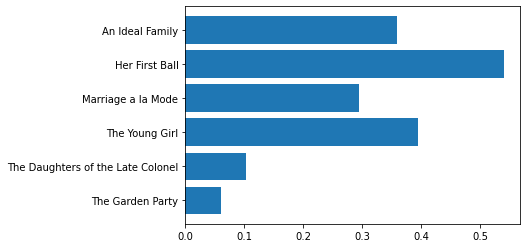

In [10]:
stories = list(adj_proportion.keys())
adjs = list(adj_proportion.values())
plt.barh(stories,adjs)

In [11]:
superlative_proportion = {}

def get_superlatives(text):
    superlatives = []
    tokens = nltk.word_tokenize(text.lower())
    tags = nltk.pos_tag(tokens)
    for i, wordTagPair in enumerate(tags):
        if i == len(tags) - 2:
            break
        word, tag = wordTagPair
        nextWord, nextTag = tags[i+1]
        if tag == "JJS":
            if nextTag == "NN":
                superlatives.append([word, nextWord])
    return(len(superlatives)/len(tokens))

for story in mansfieldStories:
    superlative_proportion[story] = get_superlatives(mansfieldStories[story])

superlative_proportion

{'The Garden Party': 0.00042936882782310007,
 'The Daughters of the Late Colonel': 0.0,
 'The Young Girl': 0.0,
 'Marriage a la Mode': 0.0006002400960384153,
 'Her First Ball': 0.00031466331025802394,
 'An Ideal Family': 0.0001703867779860283}

<BarContainer object of 6 artists>

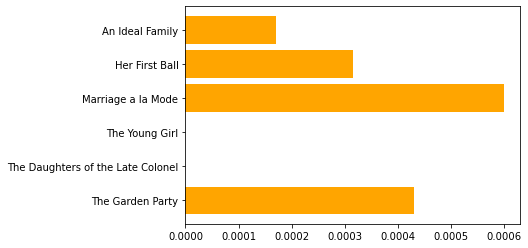

In [12]:
stories = list(superlative_proportion.keys())
sups = list(superlative_proportion.values())
plt.barh(stories,sups,color='orange')

In [13]:
adjs = list(adj_proportion.values())
sups = list(superlative_proportion.values())
adjs, sups

([0.06039788178044941,
  0.1035843472541927,
  0.39473684210526316,
  0.2939175670268107,
  0.5412208936438011,
  0.35866416766058956],
 [0.00042936882782310007,
  0.0,
  0.0,
  0.0006002400960384153,
  0.00031466331025802394,
  0.0001703867779860283])

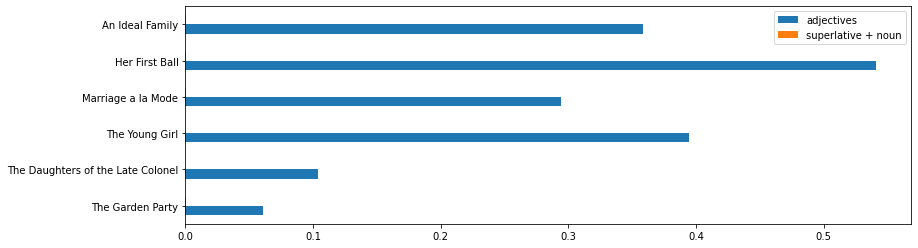

In [14]:
stories = ['The Garden Party', 'The Daughters of the Late Colonel', 'The Young Girl', 'Marriage a la Mode', 'Her First Ball', 'An Ideal Family']
adjs = list(adj_proportion.values())
sups = list(superlative_proportion.values())
df = pd.DataFrame({'adjectives':adjs,'superlative + noun':sups}, index=stories)
ax = df.plot.barh(figsize=(13,4))

I compared the proportion of different Part Of Speech tagging since I thought this could well indicate the characteristics of the stories. First, I compared the proportion of adjectives. ‘Her First Ball’ had the highest proportion of the adjectives and ‘The Daughters of the Late Colonel’ had the lowest proportion of the adjectives. Since adjectives are the descriptive words, we can identify that in the story ‘Her First Ball,’ there are many descriptions that Leila’s nervousness and awkwardness in her adolescence. Mansfield illustrated the Leila’s perspective very realistic using many adjectives. The Young Girl had the second highest adjective proportion. However, 'The Young Girl' was one of the stories that did not contain the combination of superlative adjectives and noun at all. This story was relatively less descriptive since there was no detailed description of the characters or settings in the story. 'The Young Girl' showed that the high adjective proportion does not always indicates that the story is highly descriptive.

### Frequency of pronouns

In [15]:
pronoun_proportion = {}

def get_pronouns(text):
    pronouns = []
    tokens = nltk.word_tokenize(text.lower())
    tags = nltk.pos_tag(tokens)
    for i in enumerate(tags):
        if "PRP" in i[1][1]:
            pronouns.append(i[1])
    return(len(pronouns)/len(tokens) )

for story in mansfieldStories:
    pronoun_proportion[story] = get_pronouns(mansfieldStories[story])

pronoun_proportion

{'The Garden Party': 0.08630313439244311,
 'The Daughters of the Late Colonel': 0.08834813109722679,
 'The Young Girl': 0.10210526315789474,
 'Marriage a la Mode': 0.0784313725490196,
 'Her First Ball': 0.08338577721837634,
 'An Ideal Family': 0.09729085023002215}

<BarContainer object of 6 artists>

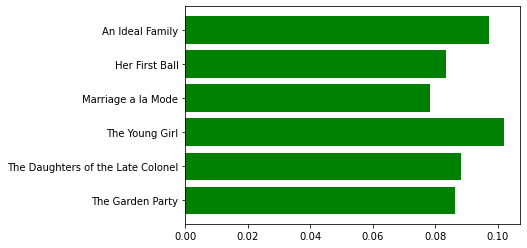

In [16]:
stories = list(pronoun_proportion.keys())
prps = list(pronoun_proportion.values())
plt.barh(stories,prps,color='green')

For the proportion of pronouns, all of the stories had similar proportion. However, among them 'The Young Girl' had the highest proportion of the pronouns. This indicates that there’s less description of the characters since the narrator mentions the pronouns most of the time instead of the names of the characters.

### Distinctive adjectives in each story

In [34]:
def freq_adjectives(text):
    adjectives = []
    tokens = nltk.word_tokenize(text.lower())
    tags = nltk.pos_tag(tokens)
    for i in enumerate(tags):
        if "JJ" in i[1][1]:
            adjectives.append(i[1])
    return adjectives

In [35]:
Counter(freq_adjectives(mansfieldStories['The Garden Party'])).most_common(20)

[(('i', 'JJ'), 29),
 (('little', 'JJ'), 25),
 (('good', 'JJ'), 9),
 (('big', 'JJ'), 8),
 (('dark', 'JJ'), 6),
 (('tall', 'JJ'), 5),
 (('last', 'JJ'), 5),
 (('such', 'JJ'), 5),
 (('young', 'JJ'), 5),
 (('dead', 'JJ'), 5),
 (('poor', 'JJ'), 5),
 (('green', 'JJ'), 4),
 (('right', 'JJ'), 4),
 (('miss', 'JJ'), 4),
 (('nice', 'JJ'), 4),
 (('small', 'JJ'), 4),
 (('same', 'JJ'), 4),
 (('extravagant', 'JJ'), 4),
 (('perfect', 'JJ'), 3),
 (('garden-party', 'JJ'), 3)]

In [36]:
Counter(freq_adjectives(mansfieldStories['The Daughters of the Late Colonel'])).most_common(20)

[(('i', 'JJ'), 41),
 (('little', 'JJ'), 14),
 (('other', 'JJ'), 12),
 (('black', 'JJ'), 10),
 (('nurse', 'JJ'), 10),
 (('dear', 'JJ'), 9),
 (('weak', 'JJ'), 9),
 (('auntie', 'JJ'), 9),
 (('much', 'JJ'), 8),
 (('good', 'JJ'), 8),
 (('last', 'JJ'), 8),
 (('nice', 'JJ'), 7),
 (('such', 'JJ'), 7),
 (('old', 'JJ'), 7),
 (('sure', 'JJ'), 6),
 (('more', 'JJR'), 6),
 (('long', 'JJ'), 6),
 (('pale', 'JJ'), 6),
 (('awful', 'JJ'), 5),
 (('least', 'JJS'), 5)]

In [37]:
Counter(freq_adjectives(mansfieldStories['The Young Girl'])).most_common(20)

[(('i', 'JJ'), 26),
 (('little', 'JJ'), 14),
 (('blue', 'JJ'), 4),
 (('white', 'JJ'), 4),
 (('old', 'JJ'), 3),
 (('open', 'JJ'), 3),
 (('more', 'JJR'), 3),
 (('last', 'JJ'), 3),
 (('good', 'JJ'), 3),
 (('nice', 'JJ'), 3),
 (('first', 'JJ'), 2),
 (('sorry', 'JJ'), 2),
 (('black', 'JJ'), 2),
 (('mrs.', 'JJ'), 2),
 (('dreadful', 'JJ'), 2),
 (('same', 'JJ'), 2),
 (('-to', 'JJ'), 2),
 (('gold', 'JJ'), 2),
 (('poor', 'JJ'), 2),
 (('lovely', 'JJ'), 2)]

In [38]:
Counter(freq_adjectives(mansfieldStories['Marriage a la Mode'])).most_common(20)

[(('i', 'JJ'), 24),
 (('little', 'JJ'), 23),
 (('new', 'JJ'), 9),
 (('old', 'JJ'), 8),
 (('william', 'JJ'), 6),
 (('young', 'JJ'), 5),
 (('good', 'JJ'), 5),
 (('cool', 'JJ'), 5),
 (('same', 'JJ'), 4),
 (('open', 'JJ'), 4),
 (('isabel', 'JJ'), 4),
 (('other', 'JJ'), 4),
 (('fat', 'JJ'), 4),
 (('long', 'JJ'), 4),
 (('poor', 'JJ'), 3),
 (('last', 'JJ'), 3),
 (('dear', 'JJ'), 3),
 (('precious', 'JJ'), 3),
 (('loud', 'JJ'), 3),
 (('more', 'JJR'), 3)]

In [39]:
Counter(freq_adjectives(mansfieldStories['Her First Ball'])).most_common(20)

[(('little', 'JJ'), 24),
 (('fat', 'JJ'), 14),
 (('i', 'JJ'), 11),
 (('dark', 'JJ'), 8),
 (('first', 'JJ'), 6),
 (('other', 'JJ'), 6),
 (('great', 'JJ'), 6),
 (('old', 'JJ'), 5),
 (('last', 'JJ'), 5),
 (('new', 'JJ'), 4),
 (('long', 'JJ'), 4),
 (('white', 'JJ'), 4),
 (('golden', 'JJ'), 4),
 (('hard', 'JJ'), 3),
 (('marvellous', 'JJ'), 3),
 (('big', 'JJ'), 3),
 (('strange', 'JJ'), 3),
 (('black', 'JJ'), 3),
 (('poor', 'JJ'), 3),
 (('sheridan', 'JJ'), 2)]

In [40]:
Counter(freq_adjectives(mansfieldStories['An Ideal Family'])).most_common(20)

[(('i', 'JJ'), 43),
 (('little', 'JJ'), 26),
 (('old', 'JJ'), 24),
 (('young', 'JJ'), 11),
 (('such', 'JJ'), 8),
 (('good', 'JJ'), 6),
 (('big', 'JJ'), 5),
 (('first', 'JJ'), 4),
 (('white', 'JJ'), 4),
 (('more', 'JJR'), 4),
 (('other', 'JJ'), 4),
 (('much', 'JJ'), 4),
 (('ideal', 'JJ'), 4),
 (('soft', 'JJ'), 4),
 (('last', 'JJ'), 4),
 (('oh', 'JJ'), 4),
 (('broad', 'JJ'), 3),
 (('gay', 'JJ'), 3),
 (('h', 'JJ'), 3),
 (('whole', 'JJ'), 3)]

For more detailed comparison, I extracted the most frequent distinctive adjectives in each stories. In all six stories, there were many cases of complex moods, such as talking about dark subjects in a bright setting rather than just illustrating the single mood. Therefore, in the distribution of adjectives, there were many cases where a bright mood and a dark mood existed together. However, relatively positive adjectives such as good, new, cool, golden, and marvelous were used in the garden party, marriage a la mode, and her first ball. Conversely, negative adjectives such as weak, awful, black, blue, and dreadful were often used in The daughters of the late colonel and the young girl. In An Ideal Family, a lot of adjectives did not really contain positive or negative mood.
Moreover, I could realize that many of the Mansfield's short stories contained the word 'old' and 'young' as on of their distinctive adjectives. 'The Garden Party' containes an adjective 'young' as one of its distinctive adjectives. 'The Garden Party' describes the mood of Laura, who is a young protagonist of this story. 'The Daughters of the Late Colonel,' 'The Young Girl,' and 'Her First Ball' contains 'old' as one of their distinctive adjectives. However, those three stories also focuses on the mood of the young protagonists. Therefore, to identify the exact context of the distinctive adjectives, I realized that we should closely read the whole sentence or paragraph that contains the word. 'Marriage a la Mode' and 'An Ideal Family' contained both 'young' and 'old' as their distinctive adjectives. Since all of the stories talks about the story of life and the important event or phase of the life, they all seem to contain the adjectives 'young' and 'old' which is closely related to age.

As such, I compared how descriptive each story was through the adjectives, superlatives, and pronoun proportions using Part of Speech tagging and the mood of each story through distinctive adjectives. Although it was not possible to grasp every aspect of the story through this analysis, I think this can be one of the indicators for the comparative analysis of Mansfield’s short stories.